To programmatically compute these statistics, the most common and efficient way is to use the NumPy and Pandas libraries. These are the standard tools for data manipulation in Machine Learning.

Below is a Python script that calculates the Range, IQR, Variance, and Standard Deviation for a sample dataset.


In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Create a sample dataset
data = [10, 20, 30, 40, 50, 60, 60, 80, 90,100]

def compute_spread(numbers):
    # Convert to a numpy array for efficient calculation
    arr = np.array(numbers)

    # Range
    # Formula: Max - Min
    data_range = np.ptp(arr) # ptp stands for "peak to peak"

    # IQR (Interquartile Range)
    # Formula: Q3 - Q1
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1

    # Variance (Sample)
    # Formula: sum((x - mean)**2) / (n - 1)
    # ddof=1 ensures we calculate 'Sample Variance' instead of 'Population Variance'
    variance = np.var(arr, ddof=1)

    # Standard Deviation (Sample)
    # Formula: sqrt(variance)
    std_dev = np.std(arr, ddof=1)

    return {
        "Mean": np.mean(arr),
        "Range": data_range,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Variance": round(variance, 2),
        "Std Deviation": round(std_dev, 2)
    }

# Execute and Print Results
results = compute_spread(data)

print("--- Statistics Summary ---")
for key, value in results.items():
    print(f"{key}: {value}")

--- Statistics Summary ---
Mean: 54.0
Range: 90
Q1: 32.5
Q3: 75.0
IQR: 42.5
Variance: 893.33
Std Deviation: 29.89


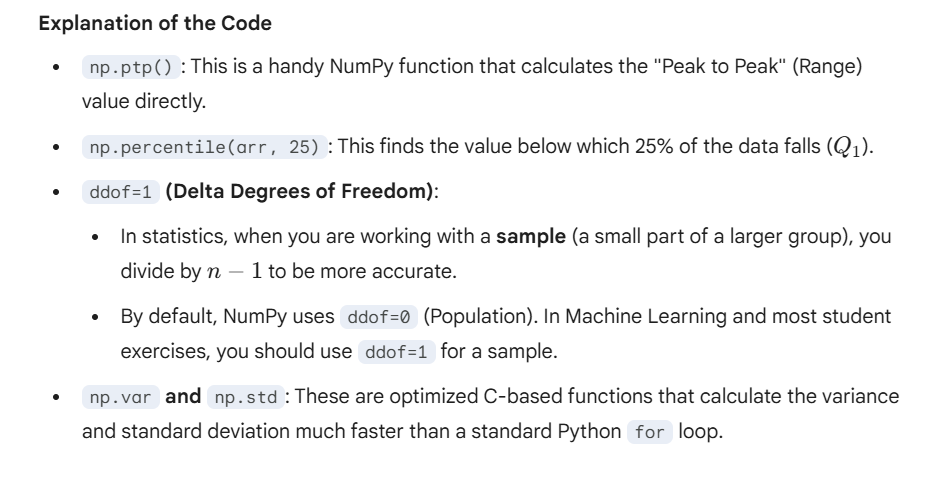

Visualization with Matplotlib
In statistics, seeing the spread is often better than just reading numbers. You can use a Box Plot to visualize the Range and IQR simultaneously.

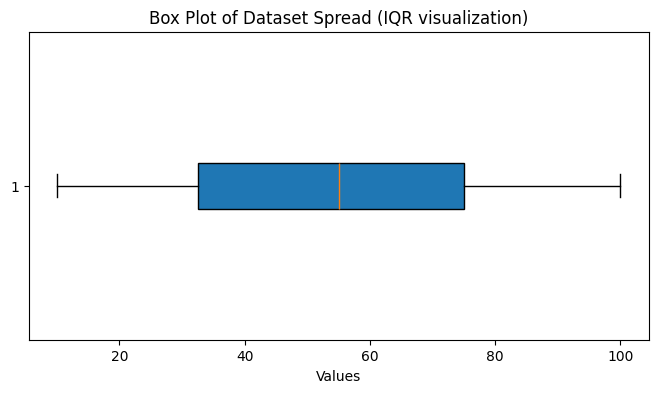

In [2]:
import matplotlib.pyplot as plt

# Visualizing the spread
plt.figure(figsize=(8, 4))
plt.boxplot(data, vert=False, patch_artist=True)
plt.title("Box Plot of Dataset Spread (IQR visualization)")
plt.xlabel("Values")
plt.show()

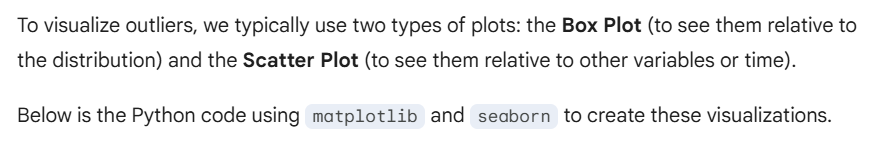

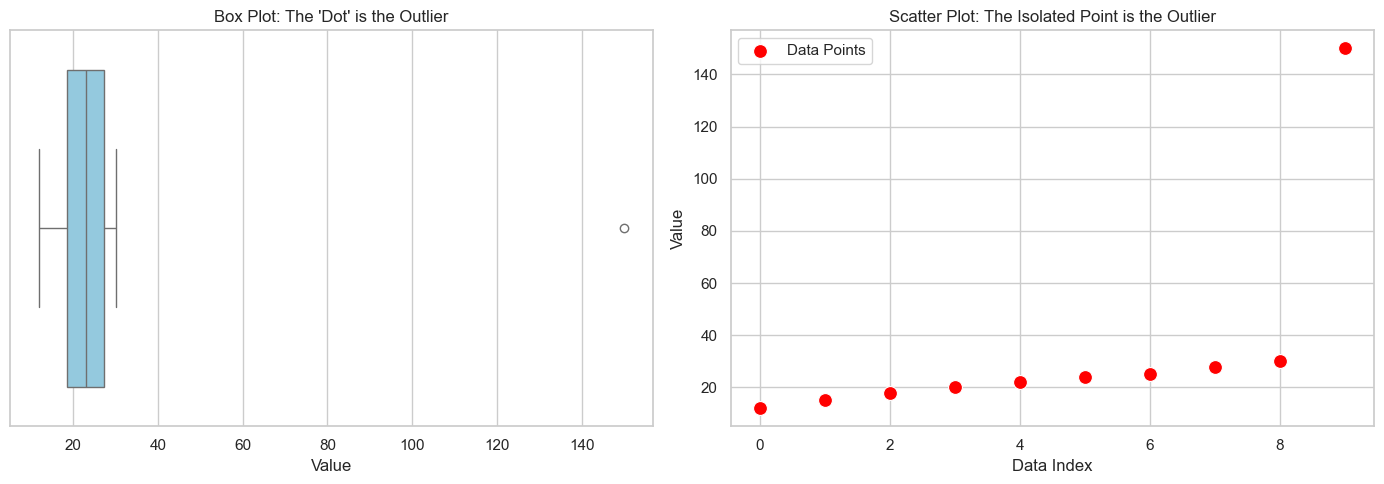

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Create data with a clear outlier
data = [12, 15, 18, 20, 22, 24, 25, 28, 30, 150] # 150 is our outlier

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Box Plot ---
# The 'whiskers' extend to 1.5 * IQR. Points beyond that are plotted as dots (outliers).
sns.boxplot(x=data, ax=ax1, color="skyblue")
ax1.set_title("Box Plot: The 'Dot' is the Outlier")
ax1.set_xlabel("Value")

# --- Plot 2: Scatter Plot ---
# We plot the index of the data on the X-axis and the value on the Y-axis.
indices = range(len(data))
sns.scatterplot(x=indices, y=data, ax=ax2, s=100, color="red", label="Data Points")
ax2.set_title("Scatter Plot: The Isolated Point is the Outlier")
ax2.set_ylabel("Value")
ax2.set_xlabel("Data Index")

plt.tight_layout()
plt.show()

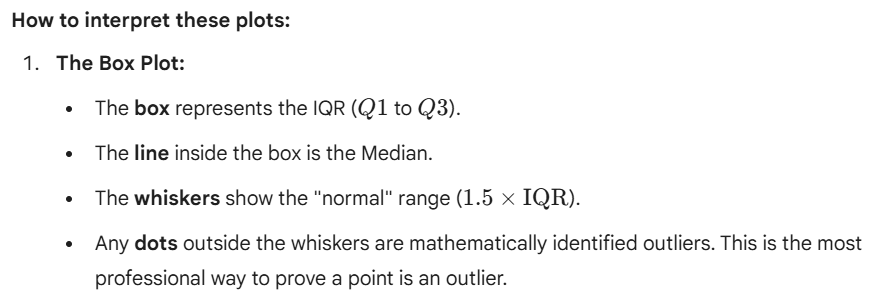

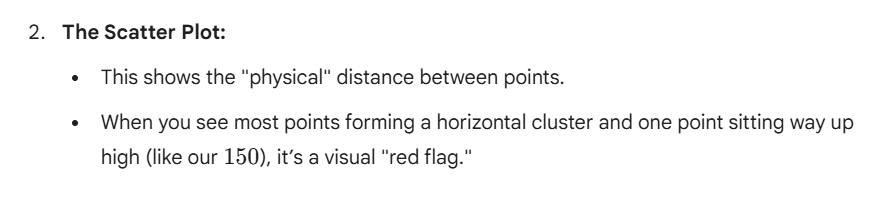